In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('whitegrid')
pd.set_option('display.max_columns', None)

df_app = pd.read_parquet('data/application_.parquet')
print("Tabla principal cargada. Filas:", df_app.shape[0])

Tabla principal cargada. Filas: 307511


Distribución de la Variable TARGET:
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64


C:\Users\diego\AppData\Local\Temp\ipykernel_8284\391786922.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cuenta_target.index, y=cuenta_target.values, palette=['g', 'r'])


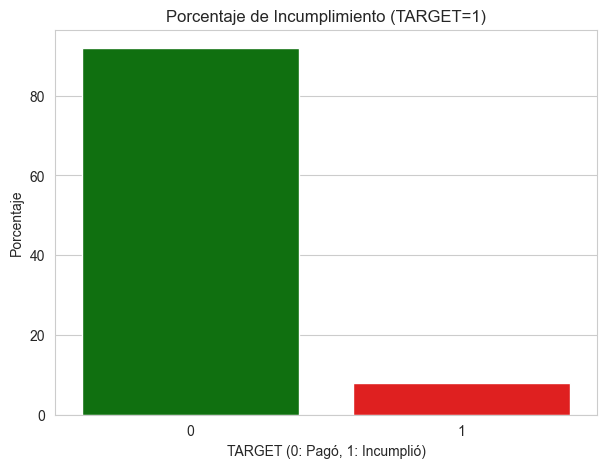

In [2]:
cuenta_target = df_app['TARGET'].value_counts(normalize=True) * 100

print("Distribución de la Variable TARGET:")
print(cuenta_target)

plt.figure(figsize=(7, 5))
sns.barplot(x=cuenta_target.index, y=cuenta_target.values, palette=['g', 'r'])
plt.title('Porcentaje de Incumplimiento (TARGET=1)')
plt.xlabel('TARGET (0: Pagó, 1: Incumplió)')
plt.ylabel('Porcentaje')
plt.show()

In [3]:
porcentaje_nulos = (df_app.isnull().sum() / len(df_app)) * 100

nulos_df = pd.DataFrame({
    'Columna': porcentaje_nulos.index,
    'Porcentaje_Nulos': porcentaje_nulos.values
}).sort_values(by='Porcentaje_Nulos', ascending=False)

print("Top 20 Columnas con Valores Faltantes:")
print(nulos_df[nulos_df['Porcentaje_Nulos'] > 0].head(20))

Top 20 Columnas con Valores Faltantes:
                     Columna  Porcentaje_Nulos
48            COMMONAREA_AVG         69.872297
62           COMMONAREA_MODE         69.872297
76           COMMONAREA_MEDI         69.872297
84  NONLIVINGAPARTMENTS_MEDI         69.432963
70  NONLIVINGAPARTMENTS_MODE         69.432963
56   NONLIVINGAPARTMENTS_AVG         69.432963
86        FONDKAPREMONT_MODE         68.386172
54      LIVINGAPARTMENTS_AVG         68.354953
82     LIVINGAPARTMENTS_MEDI         68.354953
68     LIVINGAPARTMENTS_MODE         68.354953
66            FLOORSMIN_MODE         67.848630
52             FLOORSMIN_AVG         67.848630
80            FLOORSMIN_MEDI         67.848630
47           YEARS_BUILD_AVG         66.497784
61          YEARS_BUILD_MODE         66.497784
75          YEARS_BUILD_MEDI         66.497784
21               OWN_CAR_AGE         65.990810
81             LANDAREA_MEDI         59.376738
53              LANDAREA_AVG         59.376738
67             LANDAR

In [ ]:
df_bureau = pd.read_parquet('data/bureau.parquet')

print(f"Número de clientes únicos en application_train: {df_app['SK_ID_CURR'].nunique()}")
print(f"Número de clientes únicos en bureau: {df_bureau['SK_ID_CURR'].nunique()}")
print(f"Total de filas en bureau: {df_bureau.shape[0]}")

credit_counts = df_bureau.groupby('SK_ID_CURR').size()

print("\nEstadísticas del número de créditos por cliente (Relación 1:N):")
print(credit_counts.describe())

Número de clientes únicos en application_train: 307511
Número de clientes únicos en bureau: 305811
Total de filas en bureau: 1716428

Estadísticas del número de créditos por cliente (Relación 1:N):
count    305811.000000
mean          5.612709
std           4.430354
min           1.000000
25%           2.000000
50%           4.000000
75%           8.000000
max         116.000000
dtype: float64


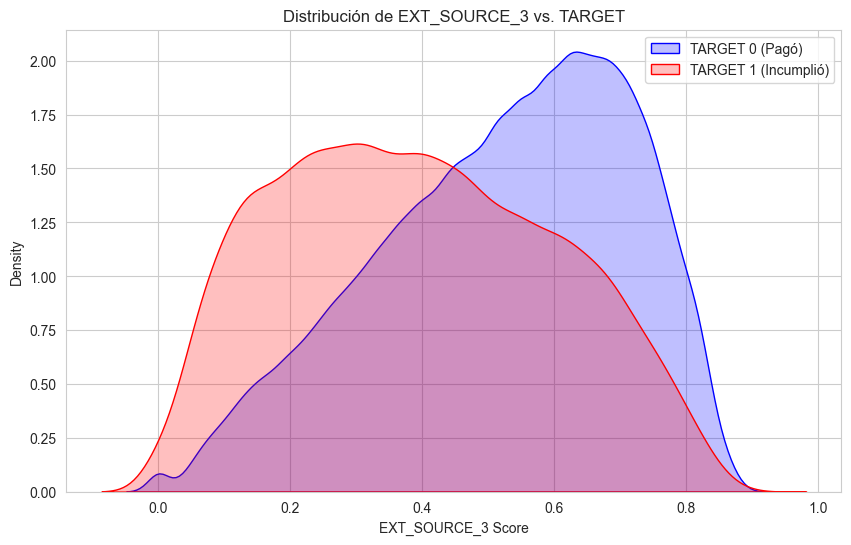


Tasa de Incumplimiento por Nivel Educativo (Promedio de TARGET=1):
NAME_EDUCATION_TYPE
Lower secondary                  0.109277
Secondary / secondary special    0.089399
Incomplete higher                0.084850
Higher education                 0.053551
Academic degree                  0.018293
Name: TARGET, dtype: float64


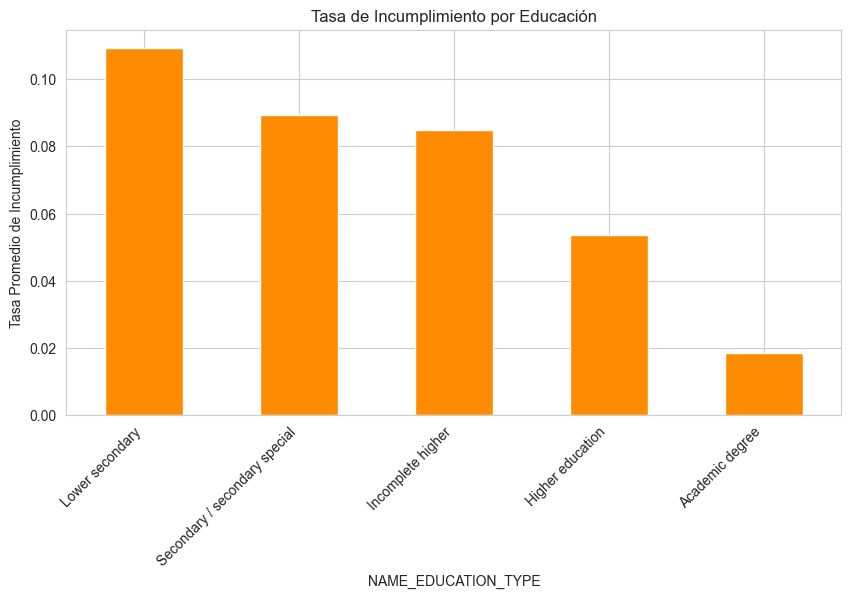

In [5]:
plt.figure(figsize=(10, 6))

sns.kdeplot(df_app.loc[df_app['TARGET'] == 0, 'EXT_SOURCE_3'], label = 'TARGET 0 (Pagó)', color='blue', fill=True)
sns.kdeplot(df_app.loc[df_app['TARGET'] == 1, 'EXT_SOURCE_3'], label = 'TARGET 1 (Incumplió)', color='red', fill=True)
plt.title('Distribución de EXT_SOURCE_3 vs. TARGET')
plt.xlabel('EXT_SOURCE_3 Score')
plt.legend()
plt.show()

risk_by_education = df_app.groupby('NAME_EDUCATION_TYPE')['TARGET'].mean().sort_values(ascending=False)

print("\nTasa de Incumplimiento por Nivel Educativo (Promedio de TARGET=1):")
print(risk_by_education)

plt.figure(figsize=(10, 5))
risk_by_education.plot(kind='bar', color='darkorange')
plt.title('Tasa de Incumplimiento por Educación')
plt.ylabel('Tasa Promedio de Incumplimiento')
plt.xticks(rotation=45, ha='right')
plt.show()

In [6]:

df_app['DAYS_EMPLOYED_YEARS'] = df_app['DAYS_EMPLOYED'] / -365

anomalous_count = df_app[df_app['DAYS_EMPLOYED'] == 365243].shape[0]
total_count = df_app.shape[0]

print(f"Conteo de valores anómalos (365243): {anomalous_count} ({anomalous_count/total_count:.2%})")

df_app['DAYS_EMPLOYED_ANOM'] = df_app["DAYS_EMPLOYED"] == 365243

print("\nTasa de incumplimiento (TARGET=1) para la anomalía:")
print(df_app.groupby('DAYS_EMPLOYED_ANOM')['TARGET'].mean())

Conteo de valores anómalos (365243): 55374 (18.01%)

Tasa de incumplimiento (TARGET=1) para la anomalía:
DAYS_EMPLOYED_ANOM
False    0.086600
True     0.053996
Name: TARGET, dtype: float64


# Resumen de Conclusiones del Análisis Exploratorio de Datos (EDA)

Este resumen consolida los hallazgos críticos de la Fase 1 (`01_data_understanding`), los cuales justifican las decisiones de preprocesamiento e ingeniería de características de la Fase 2.

## 1. Desafío Crítico: Desbalance de la Clase Objetivo (TARGET)

| Métrica | Resultado | Implicación |
| :--- | :--- | :--- |
| **Incumplimiento (TARGET=1)** | **8.07%** de los clientes. | El *dataset* está severamente desbalanceado. La métrica de Accuracy es inválida. La evaluación del modelo en la Fase 3 y 4 se centrará en **AUC-ROC** y en técnicas de balanceo. |

## 2. Desafío Mayor: Integración de Múltiples Fuentes (Relación 1:N)

| Métrica | Resultado | Implicación |
| :--- | :--- | :--- |
| **Total de Clientes** | 307,511 clientes. | Tabla principal (base del problema). |
| **Total de Créditos en Buró (`bureau.csv`)** | 1,716,428 filas. | Confirma una relación 1:N, es decir uno a muchos. |
| **Media de Créditos por Cliente** | **5.61 créditos** por cliente (Máximo: 116). | En la Fase 2, se requiere la función de agrupacion para resumir estas N filas en una sola fila de características agregadas por cliente (`SK_ID_CURR`). Esto ocurre tambien para las demas tablas secundarias dentro de los datos. |

## 3. Desafío: Limpieza y Nulidad de Datos (Variables de Vivienda)

Las variables relacionadas con la información de la propiedad (ej. `COMMONAREA_AVG`, `YEARS_BUILD`) presentan una nulo muy alto, típicamente superior al 65%.

| Columna | Porcentaje Nulos | Estrategia de la Fase 2 |
| :--- | :--- | :--- |
| `COMMONAREA_AVG` | 69.87% | Para reducir dimensionalidad y ruido, se optará por eliminar columnas con >65% de nulos o crear un *flag* binario de "Missing" antes de imputar con la mediana. |
| `LANDAREA_AVG` | 59.38% | Se creará un *feature* binario `LANDAREA_AVG_IS_NULL` para capturar la ausencia de información, y luego se imputará el valor faltante con la mediana de la columna. |

## 4. Oportunidades Clave (Drivers de Riesgo y Anomalías)

### A. Perfil de Riesgo por Educación:

La tasa de incumplimiento varía por el nivel educativo, confirmando que esta es una variable de riesgo importante:
* `Lower secondary`: **10.93% de riesgo.**
* `Higher education`: **5.36% de riesgo.**

### B. Manejo de Anomalías Temporales (`DAYS_EMPLOYED`):

Se detectó un valor anómalo (`365243`) que afecta al **18.01%** de los solicitantes.

| Grupo | Tasa de Incumplimiento (TARGET=1) |
| :--- | :--- |
| **Clientes Normales** | 8.66% |
| **Clientes con Anomalía** | 5.40% |

**Estrategia Fase 2:** El grupo anómalo es menos riesgoso que el promedio. Se creará la variable binaria `DAYS_EMPLOYED_ANOM` para que el modelo capture este efecto. Posteriormente, el valor anómalo será reemplazado por `NaN` en la columna original antes de la imputación final.